In [1]:
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
from src.ocsvm.OneClassSVMClassifier import OneClassSVMModel 
import numpy as np
import matplotlib.pyplot as plt
import torch

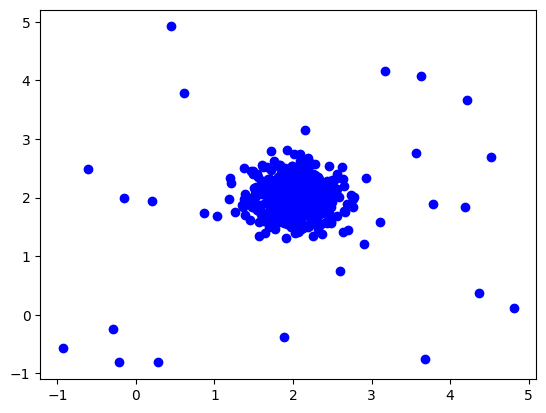

In [2]:
def make_blob_dataset(n_samples, contamination=0.05, random_state=42):
    rng = np.random.RandomState(random_state)
    X_inliers = 0.3 * rng.normal(size=(int(n_samples * (1. - contamination)), 2)) + 2
    X_outliers = rng.uniform(low=-1, high=5, size=(int(n_samples * contamination), 2))
    X = np.concatenate((X_inliers, X_outliers), axis=0)
    rng.shuffle(X)
    return X

X = make_blob_dataset(500)
plt.scatter(X[:, 0], X[:, 1], color='b');

In [3]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)


In [4]:
decision, y_pred = ocsvm.fit(X)

In [5]:
decision

array([ 2.61754018e-02,  7.66308758e-03, -8.89232639e-03,  2.94009003e-02,
        7.94768800e-03,  3.83000753e-02,  4.02913796e-03,  3.49452439e-02,
        4.61929230e-02,  3.99488603e-02,  1.12218938e-02,  2.29438835e-02,
       -1.35851435e-02,  3.54457457e-02,  2.76403985e-02,  3.42031305e-02,
        4.26730950e-02,  1.61341073e-02,  3.75857843e-02,  3.94318619e-02,
        4.65571270e-02,  3.63753810e-02,  7.22129424e-03,  4.23503837e-02,
        3.43426723e-02,  3.57323286e-02,  4.59020807e-02,  3.74430358e-02,
        4.37357081e-02,  4.14414972e-02,  3.92350928e-02,  4.43643943e-02,
        3.06566879e-02,  4.53808917e-02,  4.39290649e-02,  4.15358721e-02,
        2.18444984e-02,  3.74995514e-02, -1.55550367e-02, -1.23619812e-08,
        6.93054283e-03,  3.72529058e-02,  4.44700412e-02,  3.63195397e-02,
        3.21923595e-02,  2.85478342e-02,  1.08626439e-03,  2.54661515e-02,
        2.87932922e-02,  4.47540412e-02,  3.77043315e-02,  1.34527193e-02,
        4.51031281e-02,  

In [6]:
x_data = torch.tensor(X)

In [7]:
classifier = OneClassSVMClassifier(x_data, nu=0.5, gamma=0.8, num_inducing_points=100)

In [8]:
classifier.fit()

(array([-1.79137642e-01,  3.62215728e-02,  4.16673655e-02, -2.67914199e-01,
         1.58954932e-02, -2.92151709e-01,  2.58246068e-02, -2.71437294e-01,
         3.57955705e-02, -2.97229311e-01, -1.12969716e-08, -2.58227454e-01,
        -2.12687449e-02, -3.14112670e-02, -2.81355272e-01, -2.82093636e-01,
         3.14823949e-02,  3.36804062e-02, -4.62785460e-09,  2.81715656e-02,
        -1.75593341e-01,  3.37474390e-02, -9.80934618e-02, -2.72874014e-01,
        -3.92379182e-02,  1.22929068e-02, -2.70943478e-01, -2.55259912e-01,
         4.01168015e-02, -2.33568466e-01, -2.60230705e-01,  2.70280070e-03,
        -2.59584606e-01, -9.23573362e-03,  9.78815601e-03,  8.42381836e-03,
        -9.31153125e-03,  2.26478208e-02, -1.07337911e-02,  4.01422662e-02,
        -2.62070420e-01,  1.22997836e-02,  5.55111512e-17, -2.69117854e-01,
         3.94798213e-03, -3.98996361e-02,  2.44510121e-02, -5.55492071e-02,
        -1.52735252e-01, -1.79916421e-02,  4.46742449e-02,  2.72479402e-02,
        -1.2

In [9]:
decision, y_pred = classifier.decision()

In [10]:
decision

array([-1.79137642e-01,  3.62215728e-02,  4.16673655e-02, -2.67914199e-01,
        1.58954932e-02, -2.92151709e-01,  2.58246068e-02, -2.71437294e-01,
        3.57955705e-02, -2.97229311e-01, -1.12969716e-08, -2.58227454e-01,
       -2.12687449e-02, -3.14112670e-02, -2.81355272e-01, -2.82093636e-01,
        3.14823949e-02,  3.36804062e-02, -4.62785460e-09,  2.81715656e-02,
       -1.75593341e-01,  3.37474390e-02, -9.80934618e-02, -2.72874014e-01,
       -3.92379182e-02,  1.22929068e-02, -2.70943478e-01, -2.55259912e-01,
        4.01168015e-02, -2.33568466e-01, -2.60230705e-01,  2.70280070e-03,
       -2.59584606e-01, -9.23573362e-03,  9.78815601e-03,  8.42381836e-03,
       -9.31153125e-03,  2.26478208e-02, -1.07337911e-02,  4.01422662e-02,
       -2.62070420e-01,  1.22997836e-02,  5.55111512e-17, -2.69117854e-01,
        3.94798213e-03, -3.98996361e-02,  2.44510121e-02, -5.55492071e-02,
       -1.52735252e-01, -1.79916421e-02,  4.46742449e-02,  2.72479402e-02,
       -1.22917515e-01, -

In [11]:
y_pred

array([-1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,
       -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,
        1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
        1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,
        1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.])

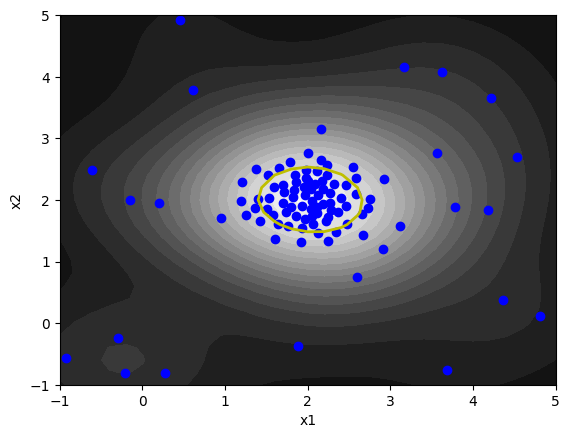

In [12]:
classifier.plot()

In [13]:
# create object of ocsvmshap
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP

In [14]:
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [15]:
x_data.shape
2**x_data.shape[1]

4

In [16]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 3/3 [00:00<00:00, 318.14it/s]


In [17]:
from src.utils.visualisation.deterministic_values import summary_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()

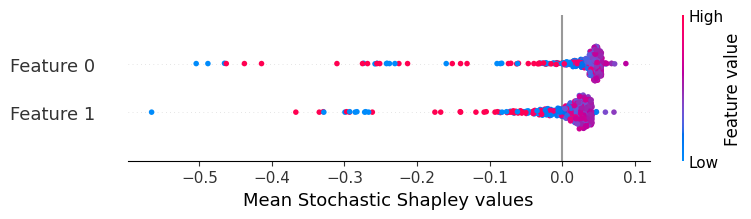

In [18]:
summary_plot(mean_stochastic_shapley_values, x_data)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

## Dataset 2

In [19]:
import numpy as np
import pandas as pd
import torch
from sklearn.datasets import make_blobs


In [20]:
# blob with a line 
def make_new_blob_dataset(n_samples, contamination=0.02, random_state=42):
    rng = np.random.RandomState(random_state)
    X_inliers = 0.3 * rng.normal(size=(int(n_samples * (1. - contamination)), 2)) + 2
    
    # Generate outliers in one direction for the first feature
    X_outliers = np.column_stack((
        rng.uniform(low=4, high=5, size=(20,)),  
        rng.uniform(low=-1, high=5, size=(20,)) 
    ))
    
    # Combine the datasets
    X = np.concatenate((X_inliers, X_outliers), axis=0)
    rng.shuffle(X)
    
    return X

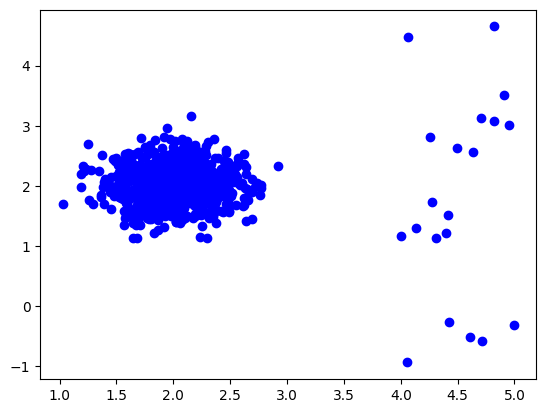

In [21]:
X = make_new_blob_dataset(1000, contamination=0.1)
plt.scatter(X[:, 0], X[:, 1], color='b');

In [22]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)
decision, y_pred = ocsvm.fit(X)
x_data = torch.tensor(X)

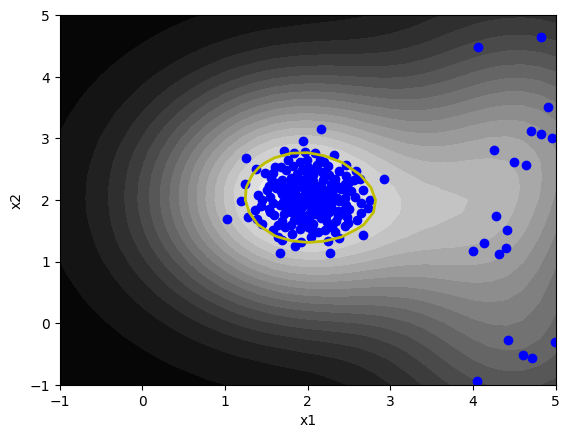

In [23]:
classifier = OneClassSVMClassifier(x_data, nu=0.2, gamma=0.5, num_inducing_points=200)
classifier.fit()
decision, y_pred = classifier.decision()
classifier.plot()

In [24]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 3/3 [00:00<00:00, 1744.96it/s]


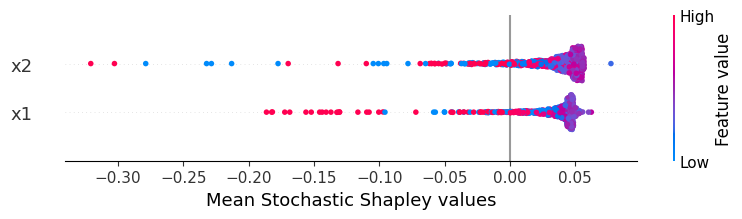

In [25]:
from src.utils.visualisation.deterministic_values import summary_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=['x1', 'x2'])
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

In [26]:
mean_stochastic_shapley_values

tensor([[ 0.0471, -0.0451,  0.0298,  ...,  0.0081,  0.0491,  0.0373],
        [ 0.0230,  0.0518,  0.0493,  ...,  0.0378, -0.0965,  0.0387]])

## Datatset3 

In [27]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data

In [28]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

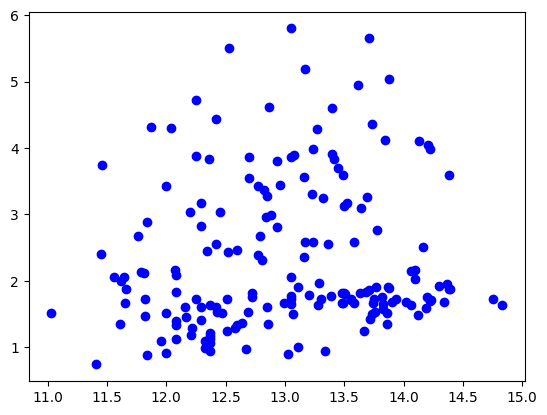

In [29]:
plt.scatter(X[:, 0], X[:, 1], color='b');